## Data Processing

We need to use Python to preprocess the data and apply the K means algorithm. This section describes the code use for the proper manipulation and includes:
* Data Gathering
* Handling missing values
* Unique value count
* Feature enginering
* K means Algorithm
* Principal Component Analysis
* Combining variables

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.cluster import KMeans, k_means
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
warnings.filterwarnings('ignore')
%matplotlib inline

np.set_printoptions(formatter={'float_kind':'{:f}'.format})
sns.set(rc={'figure.figsize':(8,6)})

data = pd.read_csv('Raw_data.csv')
print('The data set contains {} rows and {} columns.'.format(data.shape[0], data.shape[1]))
data.head()

The data set contains 14783 rows and 19 columns.


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


## Exploratory Data Analysis

### Handling missing values

Let's look out for Na values and drop them if we need to, also we want have a visualization of the features totals to get familiar with the data.

In [2]:
data.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [3]:
data = data.dropna(how='any', axis=0)
print(data.shape)
data.isnull().sum()

(14778, 19)


CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

### Unique Values per Column

In [4]:
for column in data:
    unique_vals = np.unique(data[column])
    values = len(unique_vals)
    if values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, values))

The number of values for feature CUSTOMER :14778
The number of values for feature Age :9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Postcode :14674
The number of values for feature District :225
The number of values for feature Constituency :358
The number of values for feature latitude :13242
The number of values for feature longitude :13262
The number of values for feature Current_Status :8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature Total_Household_Income :8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature How often you attend Entertaining events in a year? :

In [5]:
data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

### Unique Count per Column

We are going to exclude some of the features that have high numeric values since the next for loop will take ages adn we dont actually need that data.

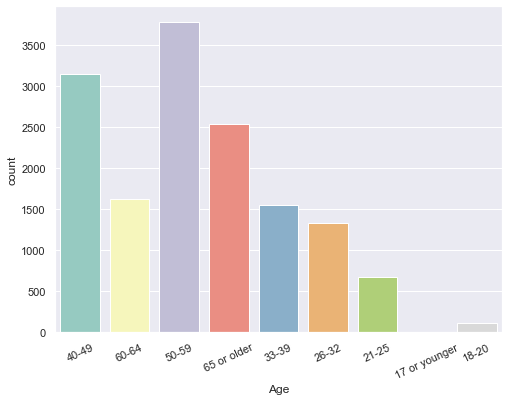

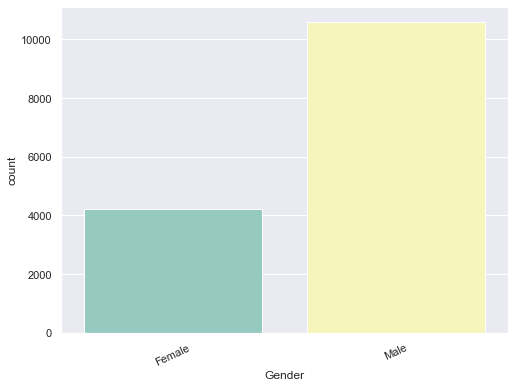

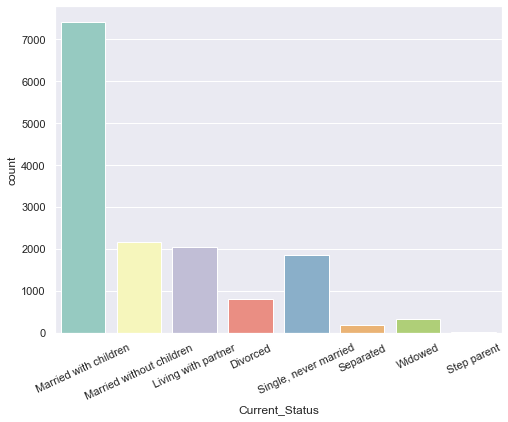

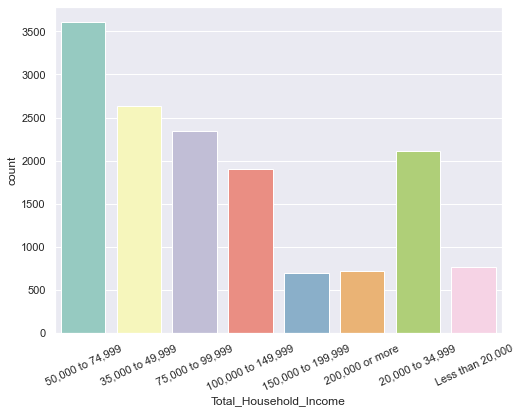

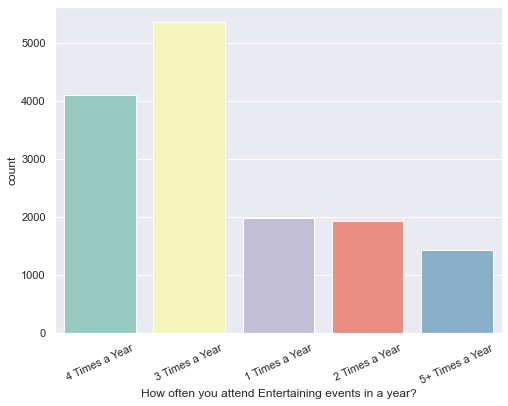

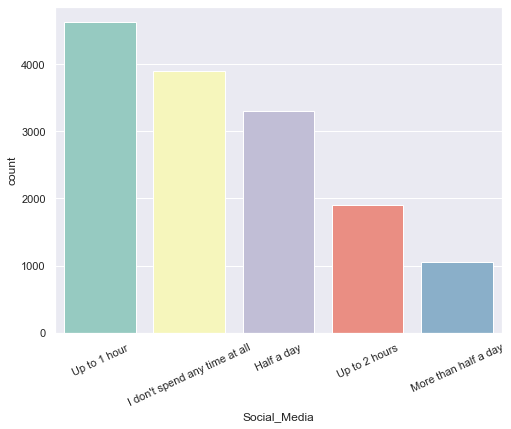

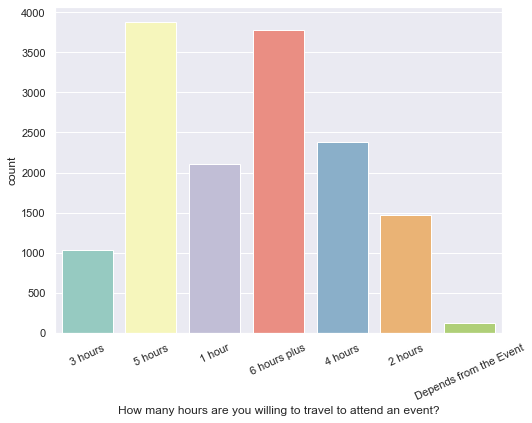

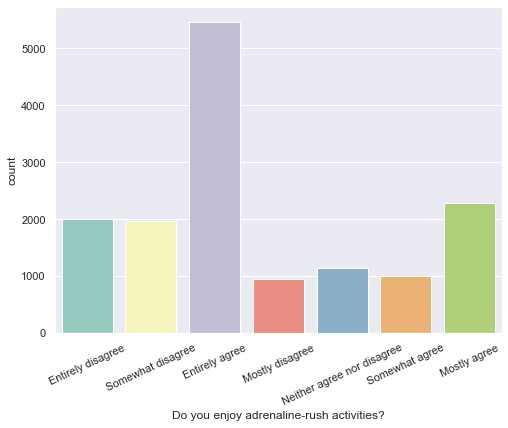

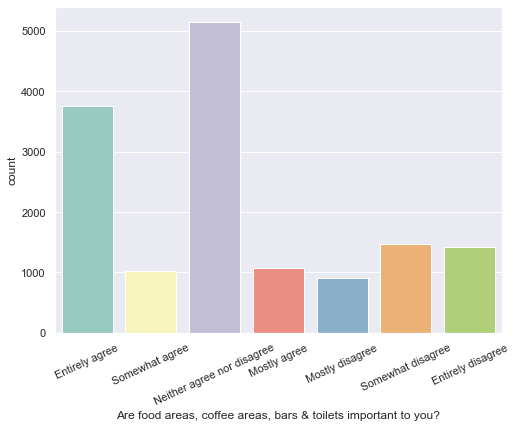

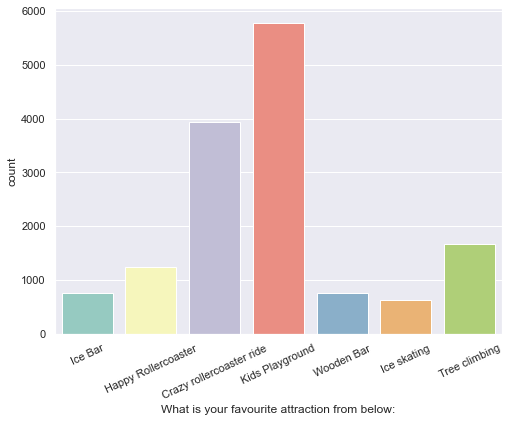

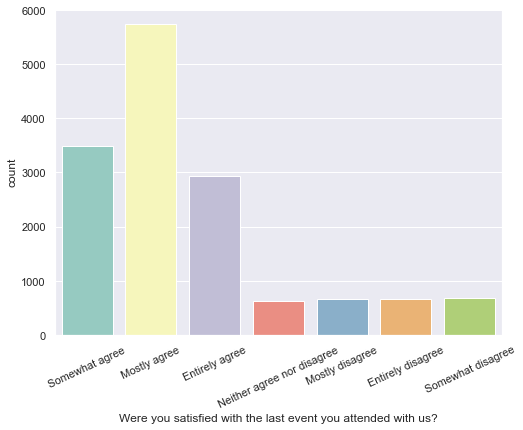

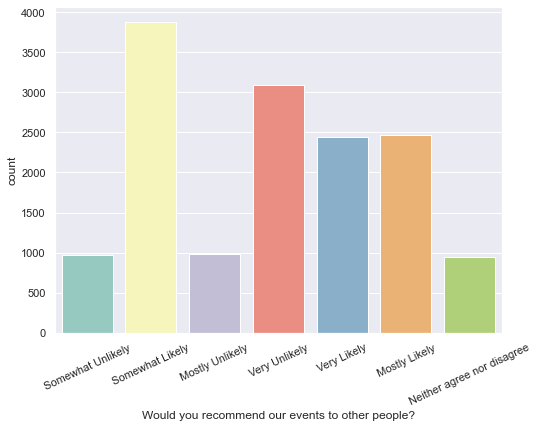

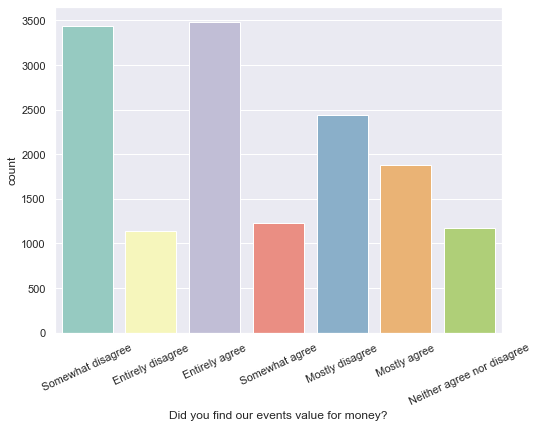

In [6]:
features = ['Age', 'Gender', 'Current_Status', 'Total_Household_Income', 
            'How often you attend Entertaining events in a year?', 
            'Social_Media', 'How many hours are you willing to travel to attend an event?',
            'Do you enjoy adrenaline-rush activities?',
            'Are food areas, coffee areas, bars & toilets important to you?',
            'What is your favourite attraction from below:',
            'Were you satisfied with the last event you attended with us?',
            'Would you recommend our events to other people?',
            'Did you find our events value for money?']

for feature in features:
    sns.countplot(x = feature, data = data, palette = 'Set3')
    plt.xticks(rotation=25)
    plt.show()

## Data Preprocessing - Feature Engineering 

### Distance Metric

We are going to introduce a new feature to the data using a function that uses the latitud and longitud of an "A" place and the latitud and longitud of a "B" to calculate the difference (distance in kilometers) to know how far away was the customer from the event.

In [7]:
def haversine_vectorize(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver))
    km = 6367 * dist 
    return km

In [8]:
data['Event Lat'] = '51.5073'
data['Event Lon'] = '0.1657'

haversine_vectorize(data['Event Lon'].astype(float), 
                    data['Event Lat'].astype(float),
                    data['longitude'].astype(float), 
                    data['latitude'].astype(float))


data['Distance from Event'] = haversine_vectorize(data['Event Lon'].astype(float), 
                                                  data['Event Lat'].astype(float),
                                                  data['longitude'].astype(float),
                                                  data['latitude'].astype(float))

### Numeric Representation

The next step is to make our categorical variables into numeric with o and 1. For now, we are not going to use the location features because we dont want our clusters to be impacted from the location of the customers due to we just want to identify similar characteristics not people living next to each other. This preprocessing is necessary so our data can fit in a machine learning algorithm, we can not apply calculations on characters, so we need to convert them into numbers.

In [9]:
print(data.shape)

raw_data = data[features]
print(raw_data.shape)

new_raw_data = pd.get_dummies(raw_data, columns = features)
print(new_raw_data.shape)
new_raw_data.head()

(14778, 22)
(14778, 13)
(14778, 86)


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


## Applying K-means Clustering 

This unsupervised machine learning algorithm used to identify groups or clusters of data with similar characteristics or in our case, similar behaviors. First, we hace to define in how many clusters are we going to split our data by defining a centroid an measuring the distance between our data points to the centroid. This way, the algorithm will pick the minimum distances and segment our data. For the second iteration the algorithm recalculates the centroids by takig all the vectors generated and average them to get new cluster centroids. It keeps doing iterations over and over until it gets the perfect cluster until the centroids have no changes.

We will start with k=3 to start and then evaluate how to improve the number of clusters.

In [10]:
X_train = new_raw_data.values

kmeans = KMeans(n_clusters=3, random_state=123)
kmeans = kmeans.fit(X_train)

print("Clusters: ", kmeans.labels_)
print("Inertia: ", kmeans.inertia_)

Clusters:  [2 2 2 ... 2 0 2]
Inertia:  114905.39784583406


We use inertia to measure how good are clusters are and we want this value as low as possible. Inertia is the within-cluster sum of squares criterion and it shows how close to each other the clusters are.

Lets iterate through different values of k and see how the inertia behaves.

In [11]:
no_clusters = range(2,20)
inertia = []

for i in no_clusters:
    kmeans = KMeans(n_clusters=i, random_state=2)
    kmeans = kmeans.fit(X_train)
    o = kmeans.inertia_
    inertia.append(o)
    print("The innertia for :", i, "Clusters is:", o)

The innertia for : 2 Clusters is: 125619.02972065956
The innertia for : 3 Clusters is: 114905.38684266769
The innertia for : 4 Clusters is: 106337.1759480162
The innertia for : 5 Clusters is: 101900.29711124646
The innertia for : 6 Clusters is: 96432.68621313221
The innertia for : 7 Clusters is: 93814.51559690775
The innertia for : 8 Clusters is: 91590.34604024964
The innertia for : 9 Clusters is: 90006.05991540223
The innertia for : 10 Clusters is: 88489.95583067613
The innertia for : 11 Clusters is: 87564.59453185058
The innertia for : 12 Clusters is: 86675.13699623354
The innertia for : 13 Clusters is: 85823.52807353433
The innertia for : 14 Clusters is: 84864.04266668808
The innertia for : 15 Clusters is: 84324.33244181525
The innertia for : 16 Clusters is: 83704.59135440234
The innertia for : 17 Clusters is: 82932.33484166248
The innertia for : 18 Clusters is: 82415.23068530187
The innertia for : 19 Clusters is: 81795.49931888991


The inertia actuallt falls down with each subsequential cluster, wich makes sense since the more clusters we have the squares are going to be less. We can make more and more clusters until we have the same number as data points, so each point has its own cluster and inertia will become very small. However this is impractical and has no sense, so a way of knowing the ideal number of clusters is to use the elbow method by potting inertia vs k and selecting the k that becames less steped.

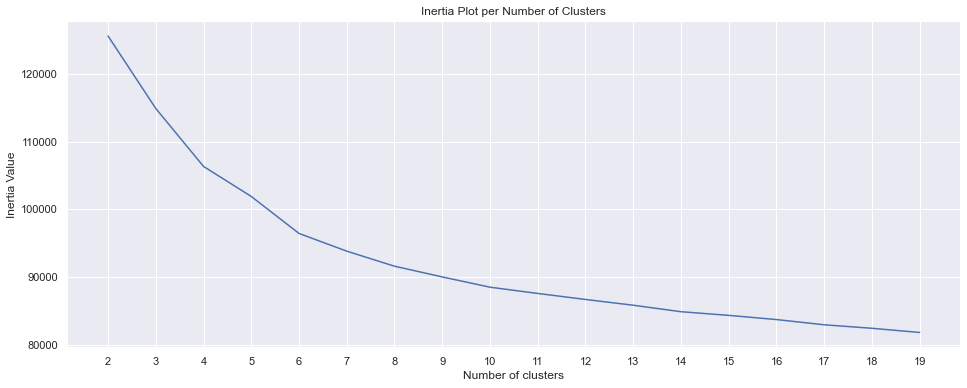

In [12]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
no_cluster = np.arange(len(no_clusters))
ax1.plot(no_cluster, inertia)
ax1.set_xticks(no_cluster)
ax1.set_xticklabels(no_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Value')
plt.title("Inertia Plot per Number of Clusters");

We could try and showthe bussines company results with 9 or 10 clusters for example and tell them that they need to create 9 or 10 distinct customer events to satisty each group necesities, this will not be very realistic or manageable. You have to think about the end results, so going ahead with 5 or 6 clusters its the best option.

In [13]:
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

predictions = kmeans.predict(X_train)

unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

cluster_count = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])
cluster_count

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2836,2178,1224,4457,4083


In [14]:
new_raw_data.shape

(14778, 86)

## Improving Results

### Principal Component Analysis

It refers to a dimensionality reduction technique that transforms a number of possibly correlated variables into a smaller number of uncorrelated variables called principal components.

In [15]:
new_raw_data.shape

(14778, 86)

The goal is to extract the most important information from the data table by compressing the size of the data set and keeping only the important information. In our case we want to reduce the number of different features (86) into a smaller number by running a principal component analysis. These new variables are called principal components since they are the most important ones that explain the most of the variance in our dataset.

Explained variance ratio (first two components): [0.167356 0.078177]


<Figure size 576x432 with 0 Axes>

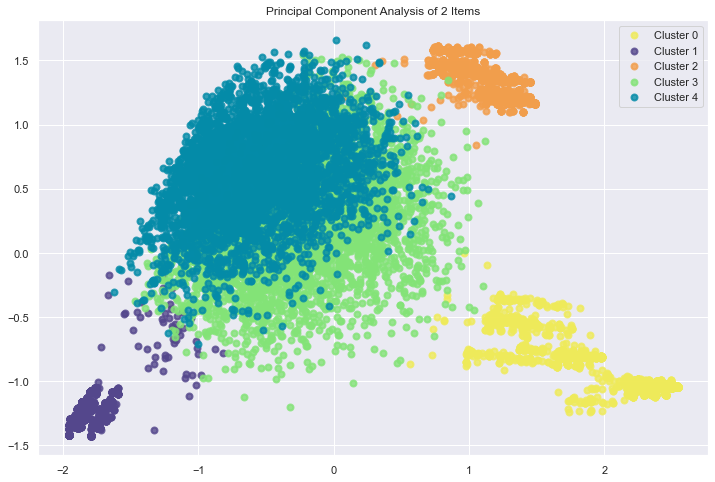

In [16]:
X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 123)
X_r = pca.fit(X).transform(X);

print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(12,8))
colors = ['#EFEA5A', '#54478C', '#F29E4C', '#83E377', '#048BA8']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name);
    
plt.legend(loc='best', shadow=False, scatterpoints=1);  
plt.title('Principal Component Analysis of 2 Items');
plt.show();

The reason why dimensionality reduction helps k-means algorithm perform better is because K means is extremely sensitive to scale, and when you have a lot of features there is no true scale anymore. 

By maximizing between cluster variance, you minimize within-cluster variance. Therefore, applying PCA before clustering could potentially help you get better clusters (with more variance) in K means.

We have 2 big clusters in the middle, that does not mean its a bad model. This is happening because we are just explaining 25% of the variance.

Now we are going to find the best number of components. First we need to calculate the total variance in the dataset and the 95% of it. To hit this last value we have to try using different number of compponents until we get a value that is close to it.

Total Variance in our dataset is:  9.789277508428572
The 95% variance we want to have is:  9.299813633007144

Variance explain with 30 n_compononets:  7.800063287617342
Variance explain with 35 n_compononets:  8.200059944222119
Variance explain with 40 n_compononets:  8.559358189926284
Variance explain with 41 n_compononets:  8.62520607241615
Variance explain with 50 n_compononets:  9.157222065601195
Variance explain with 53 n_compononets:  9.301801997586796
Variance explain with 55 n_compononets:  9.391528190593435
Variance explain with 60 n_compononets:  9.592274980903568


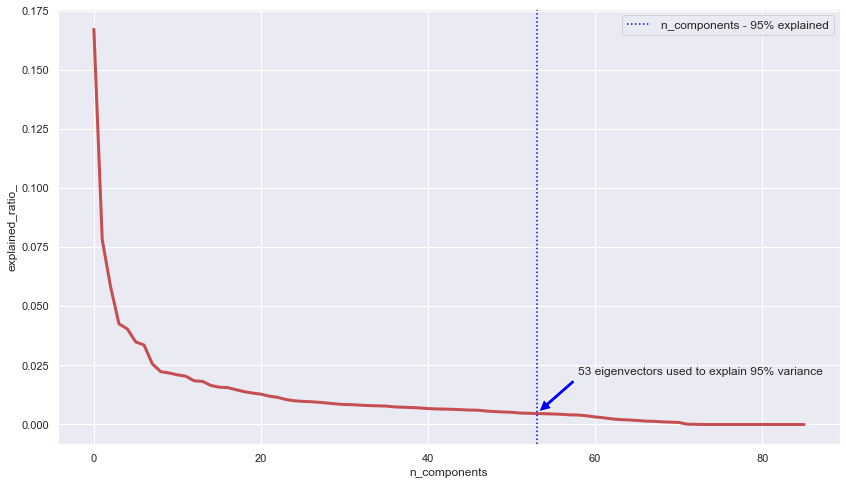

In [17]:
n_components = X.shape[1]
pca = PCA(n_components=n_components, random_state = 123)
X_r = pca.fit(X).transform(X)

total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=3, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

plt.axvline(53,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

plt.annotate('53 eigenvectors used to explain 95% variance', xy=(53, pca.explained_variance_ratio_[53]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

We can visualize this by plotting the explained variance vs the number of components. In our case 53 components is the ideal since it explains the 95% of the variance. Next, lets re-run the principal component analysis and k means to see if we have manage to improve our results.

The innertia for : 2 Clusters is: 118418.61139231412
The innertia for : 3 Clusters is: 107707.41626709272
The innertia for : 4 Clusters is: 99151.43729888005
The innertia for : 5 Clusters is: 93688.86639438194
The innertia for : 6 Clusters is: 89260.33069072859
The innertia for : 7 Clusters is: 86643.10741476604
The innertia for : 8 Clusters is: 84419.64517550234
The innertia for : 9 Clusters is: 82569.0115685741
The innertia for : 10 Clusters is: 81311.27149765786
The innertia for : 11 Clusters is: 80355.60743628097
The innertia for : 12 Clusters is: 79408.32468704716
The innertia for : 13 Clusters is: 78574.12752185581
The innertia for : 14 Clusters is: 77771.54125142454
The innertia for : 15 Clusters is: 77148.92077723412
The innertia for : 16 Clusters is: 76639.39247063849
The innertia for : 17 Clusters is: 75851.53936275029
The innertia for : 18 Clusters is: 75235.25948810476
The innertia for : 19 Clusters is: 74816.85527187576


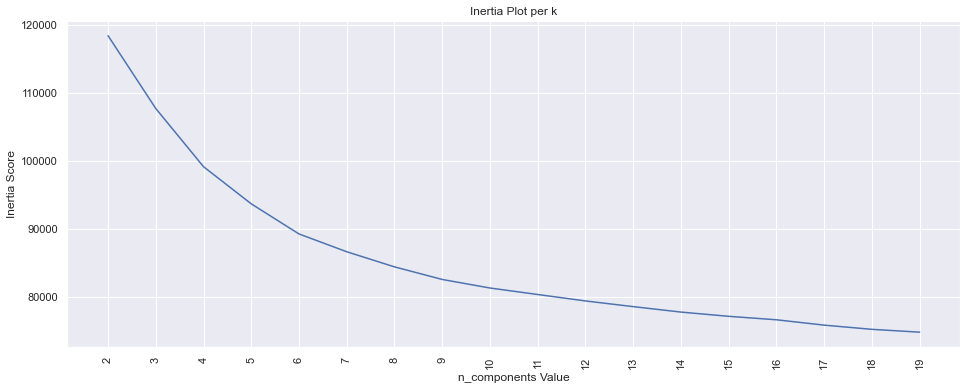

In [18]:
pca = PCA(n_components=53, random_state = 123)
X_r = pca.fit(X).transform(X)

inertia = []

for f in no_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k");

By looking at our new results we can notice that we have managed to improve our K means results after runing a principal component analysis by reducing inertia using 53 components.

### Combining variables

We want to find a way to further improve our results, a way to do this is to combine our features. Try to find different combinations of features that make sense. We have to go back an investigate our plots at the exploratory data analysis and see if we have similar groups of data. Obviously we have to exclude this features once we combine them into a new one.

In [19]:
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Enterta

In [20]:
print("The shape is: ", new_raw_data.shape)

new_raw_data['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'] = 0
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][
    (new_raw_data['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) |
    (new_raw_data['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1

new_raw_data['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'] = 0
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'][
    (new_raw_data['How often you attend Entertaining events in a year?_4 Times a Year'] == 1) | 
    (new_raw_data['How often you attend Entertaining events in a year?_5+ Times a Year'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

new_raw_data['social_media_Half a day plus'] = 0
new_raw_data['social_media_Half a day plus'][
    (new_raw_data['Social_Media_Half a day'] == 1) | 
    (new_raw_data['Social_Media_More than half a day'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'][
    (new_raw_data['How many hours are you willing to travel to attend an event?_1 hour'] == 1) | 
    (new_raw_data['How many hours are you willing to travel to attend an event?_2 hours'] == 1)] = 1

new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'][
    (new_raw_data['How many hours are you willing to travel to attend an event?_3 hours'] == 1) | 
    (new_raw_data['How many hours are you willing to travel to attend an event?_4 hours'] == 1)] = 1

new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'][
    (new_raw_data['How many hours are you willing to travel to attend an event?_5 hours'] == 1) | 
    (new_raw_data['How many hours are you willing to travel to attend an event?_6 hours plus'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'] = 0
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'][
    (new_raw_data['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1) | 
    (new_raw_data['Do you enjoy adrenaline-rush activities?_Mostly agree'] == 1)] = 1

new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'] = 0
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'][
    (new_raw_data['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1) | 
    (new_raw_data['Do you enjoy adrenaline-rush activities?_Somewhat disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

The shape is:  (14778, 86)
The shape is:  (14778, 88)
The shape is:  (14778, 89)
The shape is:  (14778, 92)
The shape is:  (14778, 94)


In [21]:
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'] = 0
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'][
    (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly agree'] == 1) | 
    (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree'] == 1)] = 1

new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'] = 0
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'][
    (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree'] == 1) | 
    (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree'] == 1) | 
    (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'] = 0
new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'][
    (new_raw_data['Were you satisfied with the last event you attended with us?_Entirely disagree'] == 1) | 
    (new_raw_data['Were you satisfied with the last event you attended with us?_Mostly disagree'] == 1) | 
    (new_raw_data['Were you satisfied with the last event you attended with us?_Somewhat disagree'] == 1) | 
    (new_raw_data['Were you satisfied with the last event you attended with us?_Neither agree nor disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

new_raw_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'] = 0
new_raw_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'][
    (new_raw_data['Would you recommend our events to other people?_Mostly Unlikely'] == 1) | 
    (new_raw_data['Would you recommend our events to other people?_Somewhat Unlikely'] == 1) | 
    (new_raw_data['Would you recommend our events to other people?_Neither agree nor disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

new_raw_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'] = 0
new_raw_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'][
    (new_raw_data['Did you find our events value for money?_Somewhat agree'] == 1) | 
    (new_raw_data['Did you find our events value for money?_Mostly agree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

The shape is:  (14778, 96)
The shape is:  (14778, 97)
The shape is:  (14778, 98)
The shape is:  (14778, 99)


In [22]:
new_raw_data.columns = new_raw_data.columns.str.replace("'","")
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Enterta

In [23]:
new_features = ['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_3 Times a Year',
       'Social_Media_I dont spend any time at all', 'Social_Media_Up to 1 hour',
       'Social_Media_Up to 2 hours',
       'How many hours are you willing to travel to attend an event?_Depends from the Event',
       'Do you enjoy adrenaline-rush activities?_Entirely agree',
       'Do you enjoy adrenaline-rush activities?_Entirely disagree',
       'Do you enjoy adrenaline-rush activities?_Neither agree nor disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Entirely agree',
       'Are food areas, coffee areas, bars & toilets important to you?_Neither agree nor disagree',
       'What is your favourite attraction from below:_Crazy rollercoaster ride',
       'What is your favourite attraction from below:_Happy Rollercoaster',
       'What is your favourite attraction from below:_Ice Bar',
       'What is your favourite attraction from below:_Ice skating',
       'What is your favourite attraction from below:_Kids Playground',
       'What is your favourite attraction from below:_Tree climbing',
       'What is your favourite attraction from below:_Wooden Bar',
       'Were you satisfied with the last event you attended with us?_Entirely agree',
       'Were you satisfied with the last event you attended with us?_Mostly agree',
       'Were you satisfied with the last event you attended with us?_Somewhat agree',
       'Would you recommend our events to other people?_Mostly Likely',
       'Would you recommend our events to other people?_Somewhat Likely',
       'Would you recommend our events to other people?_Very Likely',
       'Would you recommend our events to other people?_Very Unlikely',
       'Did you find our events value for money?_Entirely agree',
       'Did you find our events value for money?_Entirely disagree',
       'Did you find our events value for money?_Mostly disagree',
       'Did you find our events value for money?_Neither agree nor disagree',
       'Did you find our events value for money?_Somewhat disagree',
       'how_often_you_attend_entertaining_events_in_a_year_1_or_2_times',
       'how_often_you_attend_entertaining_events_in_a_year_4_or_5_times',
       'social_media_Half a day plus',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours',
       'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree',
       'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree',
       'were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree',
       'would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely',
       'did_you_find_our_events_value_for_money Mostly & Somewhat agree']

### Adding Principal Component Analysis

The innertia for : 2 Clusters is: 115919.7953844878
The innertia for : 3 Clusters is: 103587.27583228894
The innertia for : 4 Clusters is: 96342.07475328038
The innertia for : 5 Clusters is: 91346.37097505083
The innertia for : 6 Clusters is: 88976.33652557137
The innertia for : 7 Clusters is: 86893.11662997579
The innertia for : 8 Clusters is: 85000.68240489914
The innertia for : 9 Clusters is: 83649.82675141146
The innertia for : 10 Clusters is: 81956.17177527162
The innertia for : 11 Clusters is: 80781.81297973271
The innertia for : 12 Clusters is: 79773.50820150203
The innertia for : 13 Clusters is: 79075.50192469035
The innertia for : 14 Clusters is: 78163.2562291944
The innertia for : 15 Clusters is: 77440.58804256284
The innertia for : 16 Clusters is: 76707.16058874554
The innertia for : 17 Clusters is: 76192.36421907054
The innertia for : 18 Clusters is: 75442.57762168573
The innertia for : 19 Clusters is: 74805.06025098909
The innertia for : 20 Clusters is: 74256.68225311454


Text(0.5, 1.0, 'Inertia Plot per K Value')

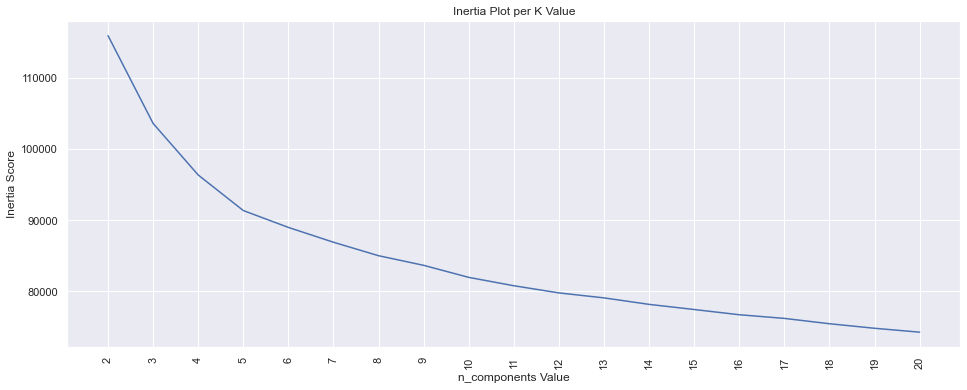

In [24]:
X_train = new_raw_data[new_features].values
no_of_clusters = range(2,21)
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per K Value")

Explained variance ratio (first two components): [0.192767 0.096030]


<Figure size 576x432 with 0 Axes>

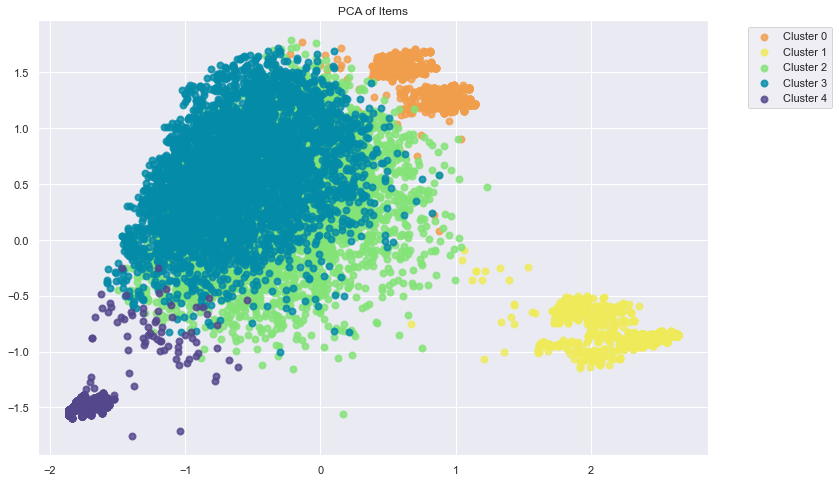

In [25]:
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

X = X_train
y_num = predictions
target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]
pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)

print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(12,8))
colors = ['#F29E4C', '#EFEA5A', '#83E377', '#048BA8', '#54478C']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Total Variance in our dataset is:  9.322886930766542
The 95% variance we want to have is:  8.856742584228215

Variance explain with 30 n_compononets:  8.17407311121065
Variance explain with 35 n_compononets:  8.558137719474265
Variance explain with 36 n_compononets:  8.6232779790702
Variance explain with 40 n_compononets:  8.86339682285
Variance explain with 41 n_compononets:  8.91438719262266
Variance explain with 50 n_compononets:  9.26857425202093


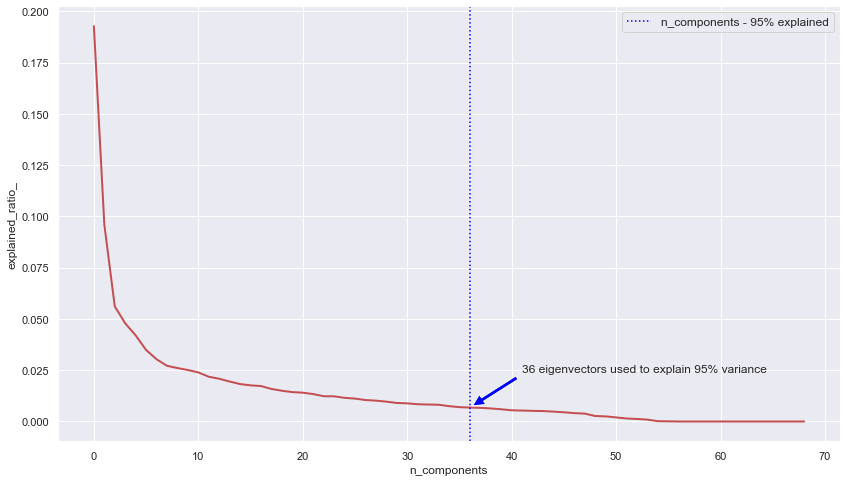

In [26]:
n_components = X.shape[1]

pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)

total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 36 n_compononets: ", sum(a["Explained Variance"][0:36]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

plt.axvline(36,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))
plt.annotate('36 eigenvectors used to explain 95% variance', xy=(36, pca.explained_variance_ratio_[36]), xytext=(41, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))
plt.show()

The innertia for : 2 Clusters is: 106553.27929536812
The innertia for : 3 Clusters is: 93248.20403981635
The innertia for : 4 Clusters is: 86028.19738464046
The innertia for : 5 Clusters is: 81047.00130286711
The innertia for : 6 Clusters is: 78697.64429276678
The innertia for : 7 Clusters is: 76615.01632987644
The innertia for : 8 Clusters is: 74779.92393385699
The innertia for : 9 Clusters is: 73253.50501800435
The innertia for : 10 Clusters is: 72047.6386473268
The innertia for : 11 Clusters is: 70909.02563880173
The innertia for : 12 Clusters is: 69735.29202995755
The innertia for : 13 Clusters is: 68932.63420751494
The innertia for : 14 Clusters is: 67800.04863331771
The innertia for : 15 Clusters is: 67099.01020510832
The innertia for : 16 Clusters is: 66572.6969937115
The innertia for : 17 Clusters is: 65959.73714772018
The innertia for : 18 Clusters is: 65346.273946087924
The innertia for : 19 Clusters is: 64583.84703082269
The innertia for : 20 Clusters is: 63997.97645148794


Text(0.5, 1.0, 'Inertia Plot per k')

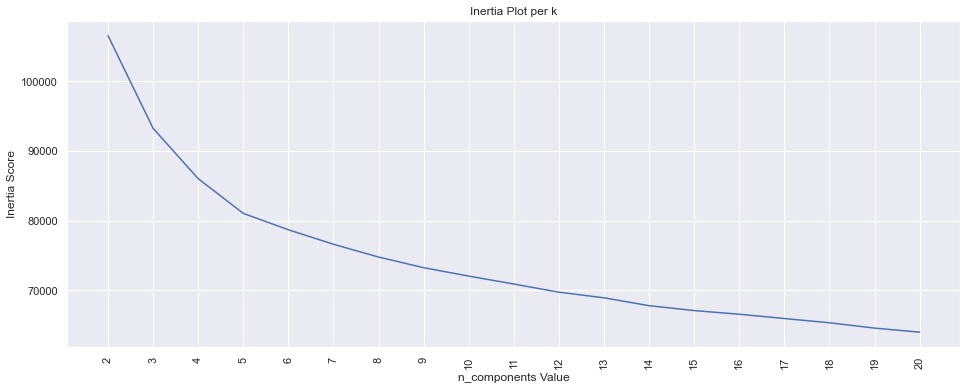

In [27]:
pca = PCA(n_components=36, random_state = 123)
X_r = pca.fit(X).transform(X)

inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Final Step

After everything we have done we are now certain of the ideal values and practices that we need to apply to our data. So lets run a Principal Component Analysis dataset with 36 components and then run K means with 5 clusters.

In [28]:
pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

data['Clusters'] = clusters

data['Clusters Category'] = 'No Data'
data['Clusters Category'].loc[data['Clusters'] == 0] = 'Cluster 1'
data['Clusters Category'].loc[data['Clusters'] == 1] = 'Cluster 2'
data['Clusters Category'].loc[data['Clusters'] == 2] = 'Cluster 3'
data['Clusters Category'].loc[data['Clusters'] == 3] = 'Cluster 4'
data['Clusters Category'].loc[data['Clusters'] == 4] = 'Cluster 5'

data.head(20)

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,...,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?,Event Lat,Event Lon,Distance from Event,Clusters,Clusters Category
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree,51.5073,0.1657,34.342502,2,Cluster 3
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree,51.5073,0.1657,41.376761,3,Cluster 4
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",...,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree,51.5073,0.1657,701.484783,3,Cluster 4
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,51.5073,0.1657,176.943287,4,Cluster 5
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,51.5073,0.1657,17.216110,0,Cluster 1
5,6,65 or older,Male,AL7 9AJ,Welwyn Hatfield,Welwyn Hatfield,51.804196,-0.205381,Married with children,"35,000 to 49,999",...,Neither agree nor disagree,Wooden Bar,Mostly agree,Somewhat Unlikely,Somewhat agree,51.5073,0.1657,41.748818,3,Cluster 4
6,7,50-59,Female,BL1 4NW,Bolton,Bolton West,53.581008,-2.455316,Living with partner,"50,000 to 74,999",...,Mostly agree,Ice Bar,Mostly agree,Mostly Unlikely,Somewhat agree,51.5073,0.1657,290.609331,3,Cluster 4
7,8,33-39,Male,DA1 9GL,Dartford,Dartford,51.444500,0.209755,Married with children,"100,000 to 149,999",...,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,51.5073,0.1657,7.615727,0,Cluster 1
8,9,33-39,Female,BL9 9GP,Bury,Bury North,53.580693,-2.283884,Divorced,"35,000 to 49,999",...,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,51.5073,0.1657,283.674569,4,Cluster 5
9,10,33-39,Male,HP22 5ZF,Aylesbury Vale,Aylesbury,51.803390,-0.724381,Married with children,"50,000 to 74,999",...,Mostly agree,Ice Bar,Neither agree nor disagree,Mostly Unlikely,Somewhat disagree,51.5073,0.1657,69.627131,2,Cluster 3


Creating order columns can help us with visualization at Power BI.

In [29]:
data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?', 'Event Lat', 'Event Lon',
       'Distance from Event', 'Clusters', 'Clusters Category'],
      dtype='object')

In [30]:
data['Household Income Order'] = 0
data['Household Income Order'].loc[data['Total_Household_Income'] == 'Less than 20,000'] = 1
data['Household Income Order'].loc[data['Total_Household_Income'] == '20,000 to 34,999'] = 2
data['Household Income Order'].loc[data['Total_Household_Income'] == '35,000 to 49,999'] = 3
data['Household Income Order'].loc[data['Total_Household_Income'] == '50,000 to 74,999'] = 4
data['Household Income Order'].loc[data['Total_Household_Income'] == '75,000 to 99,999'] = 5
data['Household Income Order'].loc[data['Total_Household_Income'] == '100,000 to 149,999'] = 6
data['Household Income Order'].loc[data['Total_Household_Income'] == '150,000 to 199,999'] = 7
data['Household Income Order'].loc[data['Total_Household_Income'] == '200,000 or more'] = 8

data['Social_Media'] = data['Social_Media'].str.replace("'","")

data['Social Media Time Spend Order'] = 0
data['Social Media Time Spend Order'].loc[data['Social_Media'] == 'I dont spend any time at all'] = 1
data['Social Media Time Spend Order'].loc[data['Social_Media'] == 'Up to 1 hour'] = 2
data['Social Media Time Spend Order'].loc[data['Social_Media'] == 'Up to 2 hours'] = 3
data['Social Media Time Spend Order'].loc[data['Social_Media'] == 'Half a day'] = 4
data['Social Media Time Spend Order'].loc[data['Social_Media'] == 'More than half a day'] = 5

data['Food Areas Coffee Areas Bars Toilets Agree Order'] = 0
data['Food Areas Coffee Areas Bars Toilets Agree Order'].loc[data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Entirely agree'] = 1
data['Food Areas Coffee Areas Bars Toilets Agree Order'].loc[data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Mostly agree'] = 2
data['Food Areas Coffee Areas Bars Toilets Agree Order'].loc[data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Somewhat agree'] = 3
data['Food Areas Coffee Areas Bars Toilets Agree Order'].loc[data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Neither agree nor disagree'] = 4
data['Food Areas Coffee Areas Bars Toilets Agree Order'].loc[data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Somewhat disagree'] = 5
data['Food Areas Coffee Areas Bars Toilets Agree Order'].loc[data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Mostly disagree'] = 6
data['Food Areas Coffee Areas Bars Toilets Agree Order'].loc[data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Entirely disagree'] = 7

data['Enjoy Adrenaline Rush Activities Agree Order'] = 0
data['Enjoy Adrenaline Rush Activities Agree Order'].loc[data['Do you enjoy adrenaline-rush activities?'] == 'Entirely agree'] = 1
data['Enjoy Adrenaline Rush Activities Agree Order'].loc[data['Do you enjoy adrenaline-rush activities?'] == 'Mostly agree'] = 2
data['Enjoy Adrenaline Rush Activities Agree Order'].loc[data['Do you enjoy adrenaline-rush activities?'] == 'Somewhat agree'] = 3
data['Enjoy Adrenaline Rush Activities Agree Order'].loc[data['Do you enjoy adrenaline-rush activities?'] == 'Neither agree nor disagree'] = 4
data['Enjoy Adrenaline Rush Activities Agree Order'].loc[data['Do you enjoy adrenaline-rush activities?'] == 'Somewhat disagree'] = 5
data['Enjoy Adrenaline Rush Activities Agree Order'].loc[data['Do you enjoy adrenaline-rush activities?'] == 'Mostly disagree'] = 6
data['Enjoy Adrenaline Rush Activities Agree Order'].loc[data['Do you enjoy adrenaline-rush activities?'] == 'Entirely disagree'] = 7

data['Satisfied Agree Order'] = 0
data['Satisfied Agree Order'].loc[data['Were you satisfied with the last event you attended with us?'] == 'Entirely agree'] = 1
data['Satisfied Agree Order'].loc[data['Were you satisfied with the last event you attended with us?'] == 'Mostly agree'] = 2
data['Satisfied Agree Order'].loc[data['Were you satisfied with the last event you attended with us?'] == 'Somewhat agree'] = 3
data['Satisfied Agree Order'].loc[data['Were you satisfied with the last event you attended with us?'] == 'Neither agree nor disagree'] = 4
data['Satisfied Agree Order'].loc[data['Were you satisfied with the last event you attended with us?'] == 'Somewhat disagree'] = 5
data['Satisfied Agree Order'].loc[data['Were you satisfied with the last event you attended with us?'] == 'Mostly disagree'] = 6
data['Satisfied Agree Order'].loc[data['Were you satisfied with the last event you attended with us?'] == 'Entirely disagree'] = 7

data['Value for money Agree Order'] = 0
data['Value for money Agree Order'].loc[data['Did you find our events value for money?'] == 'Entirely agree'] = 1
data['Value for money Agree Order'].loc[data['Did you find our events value for money?'] == 'Mostly agree'] = 2
data['Value for money Agree Order'].loc[data['Did you find our events value for money?'] == 'Somewhat agree'] = 3
data['Value for money Agree Order'].loc[data['Did you find our events value for money?'] == 'Neither agree nor disagree'] = 4
data['Value for money Agree Order'].loc[data['Did you find our events value for money?'] == 'Somewhat disagree'] = 5
data['Value for money Agree Order'].loc[data['Did you find our events value for money?'] == 'Mostly disagree'] = 6
data['Value for money Agree Order'].loc[data['Did you find our events value for money?'] == 'Entirely disagree'] = 7

data['Recommend Order'] = 0
data['Recommend Order'].loc[data['Would you recommend our events to other people?'] == 'Very Likely'] = 1
data['Recommend Order'].loc[data['Would you recommend our events to other people?'] == 'Mostly Likely'] = 2
data['Recommend Order'].loc[data['Would you recommend our events to other people?'] == 'Somewhat Likely'] = 3
data['Recommend Order'].loc[data['Would you recommend our events to other people?'] == 'Neither agree nor disagree'] = 4
data['Recommend Order'].loc[data['Would you recommend our events to other people?'] == 'Somewhat Unlikely'] = 5
data['Recommend Order'].loc[data['Would you recommend our events to other people?'] == 'Mostly Unlikely'] = 6
data['Recommend Order'].loc[data['Would you recommend our events to other people?'] == 'Very Unlikely'] = 7

In [31]:
data.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,...,Distance from Event,Clusters,Clusters Category,Household Income Order,Social Media Time Spend Order,Food Areas Coffee Areas Bars Toilets Agree Order,Enjoy Adrenaline Rush Activities Agree Order,Satisfied Agree Order,Value for money Agree Order,Recommend Order
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,34.342502,2,Cluster 3,4,2,1,7,3,5,5
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,41.376761,3,Cluster 4,3,2,1,5,2,7,3
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",...,701.484783,3,Cluster 4,5,1,3,5,2,7,6
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,176.943287,4,Cluster 5,3,4,4,1,3,5,3
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,17.216110,0,Cluster 1,6,2,4,6,1,1,7


In [32]:
data.to_csv('Data_Clusters.csv', sep='\t')